In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('A:/VS Code/Machine-Learning/res/weight.csv')
df=pd.DataFrame(data)
df.head()

,Weight,Height,Class
0,51,167,Underweight
1,66,177,Normal
2,75,169,Overweight
3,69,176,Normal
4,50,173,Underweight


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
encoder=LabelEncoder()
df['Binary_Classes']=encoder.fit_transform(df['Class'])
df

,Weight,Height,Class,Binary_Classes
0,51,167,Underweight,2
1,66,177,Normal,0
2,75,169,Overweight,1
3,69,176,Normal,0
4,50,173,Underweight,2
5,82,170,Overweight,1
6,65,172,Normal,0
7,58,180,Underweight,2
8,68,162,Overweight,1
9,63,165,Normal,0


In [5]:
x=df[['Weight','Height']]
x.head()

,Weight,Height
0,51,167
1,66,177
2,75,169
3,69,176
4,50,173


In [6]:
y=df['Binary_Classes']
y.head()

0    2
1    0
2    1
3    0
4    2
Name: Binary_Classes, dtype: int32

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [9]:
scale=StandardScaler()
x_test=scale.fit_transform(x_test)
x_train=scale.transform(x_train)

In [10]:
knn=KNeighborsClassifier(n_neighbors=1)
test=knn.fit(x_train,y_train)

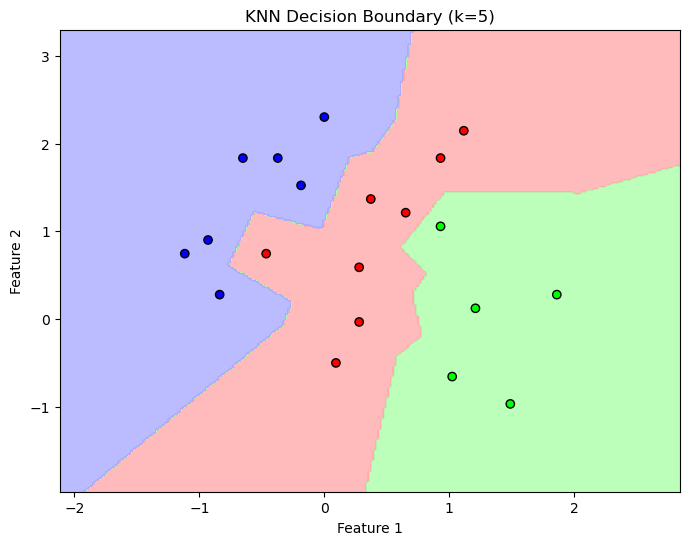

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the decision boundary plotting function
def plot_decision_boundary(clf, X, y, title="Decision Boundary"):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for each point in the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Assuming x_train and y_train are 2D for visualization
plot_decision_boundary(knn, x_train, y_train, title="KNN Decision Boundary (k=5)")

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy=accuracy_score(y_train,knn.predict(x_train))*100
accuracy


100.0

In [14]:
predict=knn.fit(x_test,y_test)

In [15]:
accuracy_score(y_test,knn.predict(x_test))*100

100.0